In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment
from chromalab.spectra import Spectra, Illuminant

In [3]:
from chromalab.inks import InkLibrary

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
wavelengths4 = np.arange(380, 781, 4)
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
premium_primaries = {}
with open(f'../data/nix/041024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        premium_primaries[name]  = spectra

In [7]:
Neugebauer(premium_primaries).mix(())

ValueError: operands could not be broadcast together with shapes (16,4) (0,) 

In [10]:
mets = {}
with open(f'../data/nix/10.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        mets[name]  = spectra

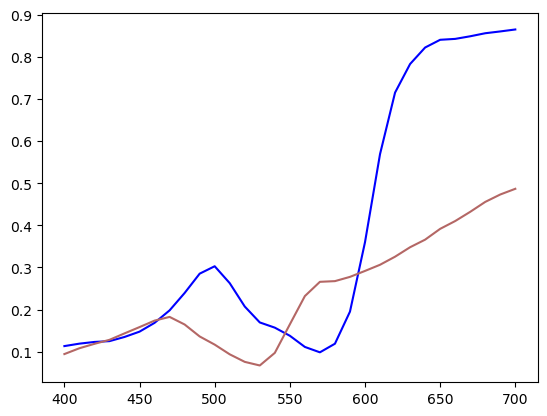

In [11]:
mets['TestOut '].plot(color='blue')
mets['TestIn'].plot()

In [12]:
perc1 = np.array((0.04, 0.0, 0.42, 0.66))
perc2 = np.array((0.24, 0.94, 0.06, 0.06))

In [13]:
data1 = mets['TestOut '].data
data2 = mets['TestIn'].data

In [14]:
for n in [0.1, 0.5, 1, 1.5, 2, 50, -0.1, -0.5, -1, -1.1, -1.2, -1.3, -1.4,-1.45, -1.5, -1.6, -1.7, -1.8, -1.9, -2, -5, -50]:
    neug = Neugebauer(premium_primaries, n=n)
    sample1 = neug.mix(perc1)
    sample2 = neug.mix(perc2)
#     Spectra(wavelengths=wavelengths10, data=sample1).plot(color='blue')
#     Spectra(wavelengths=wavelengths10, data=sample2).plot()
    score1 = np.sum(np.square((data1 - sample1)))
    score2 = np.sum(np.square((data2 - sample2)))
    print(n, "\t",round(score1,3), "\t" ,round(score2,3), "\t", round(score1 + score2,3))


0.1 	 7.442 	 8.553 	 15.996
0.5 	 1.799 	 2.933 	 4.732
1 	 0.684 	 1.97 	 2.654
1.5 	 0.414 	 1.593 	 2.007
2 	 0.307 	 1.395 	 1.702
50 	 0.101 	 0.828 	 0.929
-0.1 	 3.689 	 0.586 	 4.275
-0.5 	 0.356 	 0.046 	 0.402
-1 	 0.019 	 0.082 	 0.102
-1.1 	 0.013 	 0.112 	 0.125
-1.2 	 0.009 	 0.142 	 0.151
-1.3 	 0.008 	 0.171 	 0.179
-1.4 	 0.008 	 0.199 	 0.207
-1.45 	 0.008 	 0.212 	 0.22
-1.5 	 0.008 	 0.225 	 0.233
-1.6 	 0.009 	 0.25 	 0.259
-1.7 	 0.01 	 0.274 	 0.284
-1.8 	 0.012 	 0.295 	 0.307
-1.9 	 0.013 	 0.316 	 0.329
-2 	 0.015 	 0.335 	 0.35
-5 	 0.051 	 0.595 	 0.646
-50 	 0.091 	 0.783 	 0.874


In [20]:
for n in np.arange(-0.5, -2, -0.05):
    neug = Neugebauer(premium_primaries, n=n)
    sample1 = neug.mix(perc1)
    sample2 = neug.mix(perc2)
#     Spectra(wavelengths=wavelengths10, data=sample1).plot(color='blue')
#     Spectra(wavelengths=wavelengths10, data=sample2).plot()
    score1 = np.sum(np.square((data1 - sample1)))
    score2 = np.sum(np.square((data2 - sample2)))
    print(n, "\t",round(score1,3), "\t" ,round(score2,3), "\t", round(score1 + score2,3))


-0.5 	 0.356 	 0.046 	 0.402
-0.55 	 0.251 	 0.029 	 0.28
-0.6 	 0.179 	 0.02 	 0.199
-0.65 	 0.13 	 0.016 	 0.146
-0.7 	 0.096 	 0.018 	 0.113
-0.75 	 0.071 	 0.023 	 0.095
-0.8 	 0.054 	 0.032 	 0.085
-0.85 	 0.041 	 0.042 	 0.083
-0.9 	 0.031 	 0.055 	 0.086
-0.95 	 0.025 	 0.068 	 0.093
-1.0 	 0.019 	 0.082 	 0.102
-1.05 	 0.016 	 0.097 	 0.113
-1.1 	 0.013 	 0.112 	 0.125
-1.15 	 0.011 	 0.127 	 0.138
-1.2 	 0.009 	 0.142 	 0.151
-1.25 	 0.008 	 0.157 	 0.165
-1.3 	 0.008 	 0.171 	 0.179
-1.35 	 0.008 	 0.185 	 0.193
-1.4 	 0.008 	 0.199 	 0.207
-1.45 	 0.008 	 0.212 	 0.22
-1.5 	 0.008 	 0.225 	 0.233
-1.55 	 0.008 	 0.238 	 0.247
-1.6 	 0.009 	 0.25 	 0.259
-1.65 	 0.01 	 0.262 	 0.272
-1.7 	 0.01 	 0.274 	 0.284
-1.75 	 0.011 	 0.285 	 0.296
-1.8 	 0.012 	 0.295 	 0.307
-1.85 	 0.013 	 0.306 	 0.318
-1.9 	 0.013 	 0.316 	 0.329
-1.95 	 0.014 	 0.326 	 0.34


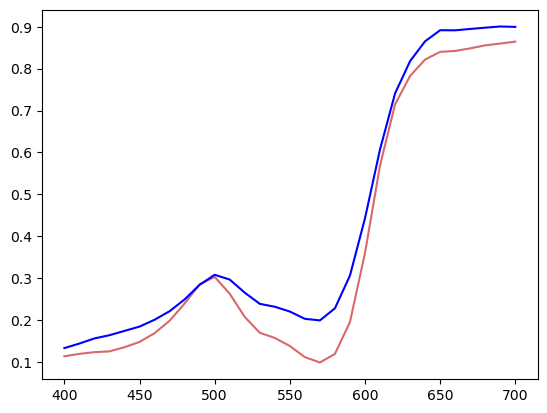

In [17]:
mets['TestOut '].plot()
neug = Neugebauer(premium_primaries, n=500)
sample1 = neug.mix(perc1)
Spectra(wavelengths=wavelengths10, data=sample1).plot(color='blue')


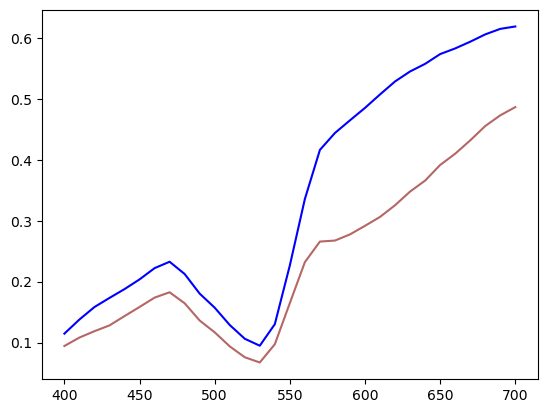

In [49]:
mets['TestIn'].plot()
neug = Neugebauer(premium_primaries, n=500)
sample2 = neug.mix(perc2)
Spectra(wavelengths=wavelengths10, data=sample2).plot(color='blue')
